<a href="https://colab.research.google.com/github/Center-for-Health-Data-Science/IntroToML/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised learning
Recall our slides on unsupervised learning - no hints to the computer about the data :)

## Principal components analysis
We will explore one method for unsupervised learning - Principal components analysis (PCA). We will use the gene expression dataset we already worked with in the data wrangling exercises. 

In [1]:
# packages needed for the exercise.
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%%bash 
wget https://github.com/Center-for-Health-Data-Science/IntroToML/raw/main/data/gtex_1000.csv.gz


--2022-05-23 02:54:47--  https://github.com/Center-for-Health-Data-Science/IntroToML/raw/main/data/gtex_1000.csv.gz
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Center-for-Health-Data-Science/IntroToML/main/data/gtex_1000.csv.gz [following]
--2022-05-23 02:54:48--  https://raw.githubusercontent.com/Center-for-Health-Data-Science/IntroToML/main/data/gtex_1000.csv.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9481366 (9.0M) [application/octet-stream]
Saving to: ‘gtex_1000.csv.gz’

     0K .......... .......... .......... .......... ..........  0% 43.3M 0s
    50K .......... .......... ....

In [5]:
gtex_rnaseq = pd.read_table("gtex_1000.csv.gz", sep="\t")

We already know that the data consists of 7 tissues, with expression from 1000 genes. Let us begin by trying to do a principal components analysis. Before we do this, let us remove the "tissue" column from the data, and log-transform the expression values.

In [11]:
from sklearn.decomposition import PCA

# remove the tissue column.
x = gtex_rnaseq.loc[:, gtex_rnaseq.columns.drop('tissue')].values
# log scale the data
x = np.log(x+0.01)

# fit pca with only 2 components.
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# Add the tissue to the data frame
principalDf["tissue"] = gtex_rnaseq["tissue"]

Now, let us plot these first 2 components to see what they can tell us about the how gene expression values might be informing on the tissue identity. 

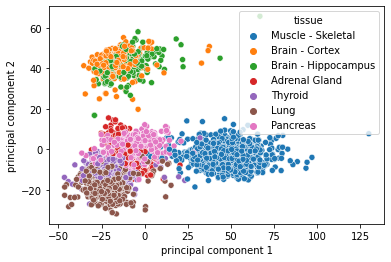

In [12]:
sns.scatterplot(data=principalDf, x="principal component 1", y="principal component 2", hue="tissue")

Now try doing this for principal components and plot pc1 vs pc2, and pc3 vs pc4. Once you have done this, use the multiscaling dimensional plot - MDS - method instead of PCA